# Carga y preprocesamiento de datos (df2s UCI)



![](/home/dm/Desktop/ejerciciolunes/air_quality_dataset/legend.png)

El objetivo de este estudio es analizar la calidad del aire de Beijing( Pekín ) con los valores del dataset principal y variables del mismo que nos han proporcionado.

##### https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/

##### No = Nitrógeno,   No2 = Óxido de nitrógeno,    03=Ozono, So2= Dióxido de Sulfuro, Co = Carbono ,  
##### pm2.5 - 10 = partículas inferiores a 2.5 micras o superiores a 10, wspm = Velocidad del viento,  dewp = Punto de Rocío

###### Para PM2,5 el tope de concentración (equivalente a un valor límite) es de 25 µg/m3
###### Para PM10 el tope de concentración (equivalente a un valor límite) es de 180 µg/m3

In [2]:
"""
# Movemos el directorio activo a una nueva localización para este df2
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir /home/dm/Desktop/ejerciciolunes/air_quality_df2
## Movemos directorio activo
%cd /home/dm/Desktop/ejerciciolunes/air_quality_df2
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228
""" 

'\n# Movemos el directorio activo a una nueva localización para este df2\n## Retrocedemos un nivel\n%cd ..\n## Creamos carpeta\n!mkdir /home/dm/Desktop/ejerciciolunes/air_quality_df2\n## Movemos directorio activo\n%cd /home/dm/Desktop/ejerciciolunes/air_quality_df2\n# Descargamos fichero comprimido\n!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip\n# Descargamos el fichero que contiene los datos a nuestro directorio activo\n!unzip PRSA2017_Data_20130301-20170228.zip\n# Nos movemos a la carpeta que contenía el zip\n%cd PRSA_Data_20130301-20170228\n'

In [3]:
import pandas as pd
import os

In [4]:

def concat_csv_files(path):
    # Lista de archivos
    files = os.listdir(path)
    # Concatenamos todos los archivos en una única dataframe
    data = pd.concat([pd.read_csv(path + "/" + f) for f in files])
    # Devolvemos la dataframe
    return data

concat_csv_files("/home/dm/Desktop/ejerciciolunes/air_quality_dataset/PRSA_Data_20130301-20170228")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [5]:
data_air = concat_csv_files("/home/dm/Desktop/ejerciciolunes/air_quality_dataset/PRSA_Data_20130301-20170228")

In [6]:
import seaborn as sns



In [7]:
def repair_null(df):
    
    """ 
    Repair null values in dataframe using mode if the column is categorical or mean if the column is numerical.
    
    """
    
    
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

repair_null(data_air)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.000000,28.000000,400.000000,52.000000,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.000000,28.000000,400.000000,50.000000,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,15.830835,19.000000,400.000000,55.000000,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.000000,14.000000,1230.766454,57.372271,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.000000,50.638586,300.000000,54.000000,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.000000,2.000000,200.000000,99.000000,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.000000,2.000000,200.000000,101.000000,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.000000,2.000000,200.000000,102.000000,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.000000,2.000000,200.000000,97.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


<AxesSubplot:>

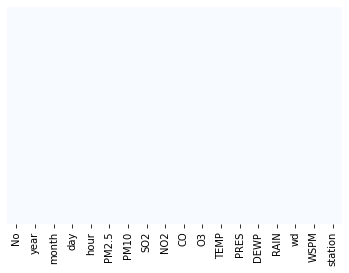

In [8]:
sns.heatmap(data_air.isnull (), yticklabels = False, cbar = False, cmap = "Blues")

In [9]:
#Change column order 

data_air = data_air[["year", "month", "day", "hour", "No","NO2", "CO", "O3","SO2", "PM10", "PM2.5", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM", "station" ]]

In [10]:
data_air["station"].value_counts()

Wanliu           35064
Gucheng          35064
Nongzhanguan     35064
Guanyuan         35064
Wanshouxigong    35064
Changping        35064
Huairou          35064
Dongsi           35064
Aotizhongxin     35064
Shunyi           35064
Tiantan          35064
Dingling         35064
Name: station, dtype: int64

In [11]:
import camelot 

file = "/home/dm/Desktop/ejerciciolunes/air_quality_dataset/sustainability-14-05104-v2.pdf"


tablas = camelot.read_pdf(file, pages="10-11", flavor="stream", multiple_tables=True, header_type="text", row_subset=10, guess_cell_position=False)
estaciones = tablas[1].df

#creo un dataframe con las estaciones ordenadas y su correspondiente long and lat
estaciones.columns = ["station", "long", "lat"]
estaciones = estaciones.sort_values(by="station")
estaciones = estaciones.drop(estaciones.index[[0,12,16,17,19,18]])
estaciones = estaciones.drop(estaciones.index[[0]])

In [12]:

#eliminar estaciones repetidas en el dataframe
estaciones = estaciones.drop_duplicates (subset = "station")

#Combinamos los dos dataframes en uno maestro teniendo en cuenta estación para añadir lat and long
data_air = data_air.merge(estaciones, on="station", how="left")




In [13]:
#Primero creamos una copia con la que trabajar tranquilos.

data_air_set = data_air.copy()


### EDA 

### Comenzamos el Análisis exploratorio de datos (EDA), conociendo primero, donde están las estaciones 

In [14]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)




In [15]:
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

mapbox_access_token = "/home/dm/Desktop/ejerciciolunes/ mapbox_access_token"

In [16]:
data_air_set.head()

,year,month,day,hour,No,NO2,CO,O3,SO2,PM10,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,long,lat
0,2013,3,1,0,1,28.000000,400.000000,52.000000,6.000000,8.0,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,116.287,39.987
1,2013,3,1,1,2,28.000000,400.000000,50.000000,6.000000,9.0,9.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,116.287,39.987
2,2013,3,1,2,3,19.000000,400.000000,55.000000,15.830835,6.0,3.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,116.287,39.987
3,2013,3,1,3,4,14.000000,1230.766454,57.372271,8.000000,30.0,11.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,116.287,39.987
4,2013,3,1,4,5,50.638586,300.000000,54.000000,9.000000,13.0,3.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,116.287,39.987


In [17]:
#Reparar  La cabecera de la columna número 1 está vacía cuando importamos a data studio, la podemos setear como index en base a las estaciones por ejemplo
data_air_set = data_air_set.set_index("station")


In [18]:
#Convertimos las columnas de fecha y tiempo a datetime y creamos una columna unica con la fecha
data_air_set.loc[:,"Date"] = pd.to_datetime(data_air_set.loc[:,["year", "month", "day", "hour"]]) 
data_air_set = data_air_set.drop(columns=["year", "month", "day", "hour"])


In [19]:
data_air_set.head()

,No,NO2,CO,O3,SO2,PM10,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,long,lat,Date
station,,,,,,,,,,,,,,,,
Wanliu,1,28.000000,400.000000,52.000000,6.000000,8.0,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,116.287,39.987,2013-03-01 00:00:00
Wanliu,2,28.000000,400.000000,50.000000,6.000000,9.0,9.0,-1.1,1023.2,-18.2,0.0,N,4.7,116.287,39.987,2013-03-01 01:00:00
Wanliu,3,19.000000,400.000000,55.000000,15.830835,6.0,3.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,116.287,39.987,2013-03-01 02:00:00
Wanliu,4,14.000000,1230.766454,57.372271,8.000000,30.0,11.0,-1.4,1024.5,-19.4,0.0,NW,3.1,116.287,39.987,2013-03-01 03:00:00
Wanliu,5,50.638586,300.000000,54.000000,9.000000,13.0,3.0,-2.0,1025.2,-19.5,0.0,N,2.0,116.287,39.987,2013-03-01 04:00:00


In [20]:
data_air_set.describe()

,No,NO2,CO,O3,SO2,PM10,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,50.638586,1230.766454,57.372271,15.830835,104.602618,79.793428,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,34.618463,1131.283304,55.760484,21.417257,91.066422,79.978679,11.430729,10.469162,13.787240,0.820624,1.245914
min,1.000000,1.026500,100.000000,0.214200,0.285600,2.000000,2.000000,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,24.000000,500.000000,12.000000,3.000000,36.000000,21.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,45.000000,900.000000,47.000000,8.000000,84.000000,57.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,70.000000,1500.000000,80.000000,19.000000,144.000000,109.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,290.000000,10000.000000,1071.000000,500.000000,999.000000,999.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [21]:
#Salvamos un nuevo csv para asegurarnos y poder trabajar en dashboard
data_air_set.to_csv("/home/dm/Desktop/ejerciciolunes/data_air_set.csv")

### Predicción usando Machine Learning

In [22]:
import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

#### Calculando índices individuales

In [23]:
#Calculamos el indice individual de SO2 

def calculate_si (so2):
    if so2 <= 40:
        si = so2*(50/40)
    if so2 > 40 and so2 <= 80:
        si = 50+(so2-40)*(50/40)
    if so2 > 80 and so2 <= 380:
        si = 100+(so2-80)*(150/260)
    if so2 > 380 and so2 <= 800:
        si = 200+(so2-380)*(250/500)
    if so2 > 800:
        si = 300+(so2-800)*(300/500)
    return si

data_air_set["si"] = data_air_set["SO2"].apply(calculate_si)




#Calculamos el indice individual de NO2 (ni)
def calculate_ni (no2):
    if no2 <= 40:
        ni = no2*(50/40)
    if no2 > 40 and no2 <= 80:
        ni = 50+(no2-40)*(50/40)
    if no2 > 80 and no2 <= 380:
        ni = 100+(no2-80)*(150/260)
    if no2 > 380 and no2 <= 800:
        ni = 200+(no2-380)*(250/500)
    if no2 > 800:
        ni = 300+(no2-800)*(300/500)
    return ni

data_air_set["ni"] = data_air_set["NO2"].apply(calculate_ni)


#calculamos el indice individual de CO
def calculate_co (co):
    if co <= 40:
        co = co*(50/40)
    if co > 40 and co <= 80:
        co = 50+(co-40)*(50/40)
    if co > 80 and co <= 380:
        co = 100+(co-80)*(150/260)
    if co > 380 and co <= 800:
        co = 200+(co-380)*(250/500)
    if co > 800:
        co = 300+(co-800)*(300/500)
    return co

data_air_set["co"] = data_air_set["CO"].apply(calculate_co)



#Calculamos el indice individual de O3
def calculate_o3 (o3):
    if o3 <= 40:
        o3 = o3*(50/40)
    if o3 > 40 and o3 <= 80:
        o3 = 50+(o3-40)*(50/40)
    if o3 > 80 and o3 <= 380:
        o3 = 100+(o3-80)*(150/260)
    if o3 > 380 and o3 <= 800:
        o3 = 200+(o3-380)*(250/500)
    if o3 > 800:
        o3 = 300+(o3-800)*(300/500)
    return o3

data_air_set["o3"] = data_air_set["O3"].apply(calculate_o3)
data_air_set.head()


#calculamos el indice individual de No
def calculate_no (no):
    if no <= 40:
        no = no*(50/40)
    if no > 40 and no <= 80:
        no = 50+(no-40)*(50/40)
    if no > 80 and no <= 380:
        no = 100+(no-80)*(150/260)
    if no > 380 and no <= 800:
        no = 200+(no-380)*(250/500)
    if no > 800:
        no = 300+(no-800)*(300/500)
    return no
data_air_set["no"] = data_air_set["No"].apply(calculate_no)

In [24]:
data_air_set.columns

Index(['No', 'NO2', 'CO', 'O3', 'SO2', 'PM10', 'PM2.5', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'long', 'lat', 'Date', 'si', 'ni', 'co', 'o3',
       'no'],
      dtype='object')

In [25]:
#Calculamos el indice de calidad del aire con la formula que vimos en el pdf hecha funcion de forma simple ( sorry )

def calcular_aqi (si, ni, co, o3, no):
    aqi = (0.0304*si)+(0.9608*ni)+(0.0193*co)+(0.0049*o3)+(0.0062*no)
    return aqi

data_air_set["aqi"] = data_air_set.apply(lambda x: calcular_aqi(x["si"], x["ni"], x["co"], x["o3"], x["no"]), axis=1)
df = data_air_set[["Date", "si", "ni", "co", "o3", "no", "aqi"]]
df.head()

,Date,si,ni,co,o3,no,aqi
station,,,,,,,
Wanliu,2013-03-01 00:00:00,7.500000,35.000000,210.000000,65.000000,1.25,38.235250
Wanliu,2013-03-01 01:00:00,7.500000,35.000000,210.000000,62.500000,2.50,38.230750
Wanliu,2013-03-01 02:00:00,19.788543,23.750000,210.000000,68.750000,3.75,27.833697
Wanliu,2013-03-01 03:00:00,10.000000,17.500000,558.459872,71.715339,5.00,28.278681
Wanliu,2013-03-01 04:00:00,11.250000,63.298232,226.923077,67.500000,6.25,65.908057


In [26]:
#Reseteamos el index para que station quede como nombre de columna
data_air_set = data_air_set.reset_index() 

In [27]:
#Lo salvamos en un nuevo csv para asegurarnos y poder trabajar tranquilos en nuestro modelo 
data_air_set.to_csv("/home/dm/Desktop/ejerciciolunes/data_air_set_model.csv")

In [28]:
data_air_set_model = pd.read_csv("/home/dm/Desktop/ejerciciolunes/data_air_set_model.csv")

<AxesSubplot:xlabel='year', ylabel='aqi'>

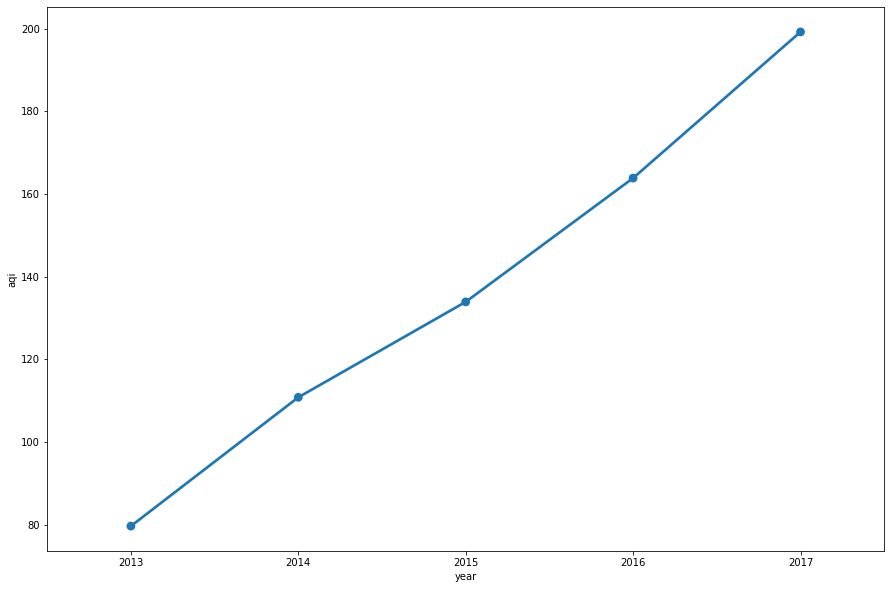

In [29]:
data_air_set_model['Date'] = pd.to_datetime(data_air_set_model['Date'],format='%Y-%m-%d') # date parse
data_air_set_model['year'] = data_air_set_model['Date'].dt.year # year
data_air_set_model['year'] = data_air_set_model['year'].fillna(0.0).astype(int)
data = data_air_set_model[(data_air_set_model['year']>0)]

df = data[['aqi','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='aqi', data=df)

In [30]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline


#Seteamos y jugamos con la fecha en un dataframe genérico
df=data_air_set_model[['aqi','Date']]
df["Date"] = pd.to_datetime(df['Date'])


In [31]:
#Calculamos la media anual de aqi
df=df.set_index('Date').resample('M')["aqi"].mean()
df.head()

Date
2013-03-31    91.174682
2013-04-30    67.276083
2013-05-31    75.438269
2013-06-30    78.943014
2013-07-31    68.618314
Freq: M, Name: aqi, dtype: float64

In [32]:
df.head(20)

Date
2013-03-31     91.174682
2013-04-30     67.276083
2013-05-31     75.438269
2013-06-30     78.943014
2013-07-31     68.618314
2013-08-31     69.981089
2013-09-30     88.165532
2013-10-31    102.525188
2013-11-30     99.338891
2013-12-31    110.339992
2014-01-31    122.944869
2014-02-28    125.906988
2014-03-31    118.045096
2014-04-30    110.837914
2014-05-31    101.589802
2014-06-30     96.814691
2014-07-31     98.390501
2014-08-31    104.605473
2014-09-30    116.383390
2014-10-31    140.735141
Freq: M, Name: aqi, dtype: float64

In [33]:
import numpy as np

data=df.reset_index(level=0, inplace=False)
data = data[ (data['aqi'] > 0) ]
data=data[data.Date != '2013-03-31'] 
data = data.reset_index(drop=True)
data.head()



,Date,aqi
0,2013-04-30,67.276083
1,2013-05-31,75.438269
2,2013-06-30,78.943014
3,2013-07-31,68.618314
4,2013-08-31,69.981089


In [34]:
data.tail(20)

,Date,aqi
27,2015-07-31,125.780967
28,2015-08-31,123.216462
29,2015-09-30,137.770350
30,2015-10-31,152.958900
31,2015-11-30,174.584501
32,2015-12-31,199.119394
33,2016-01-31,167.543881
34,2016-02-29,145.494744
35,2016-03-31,172.618872
36,2016-04-30,158.819746


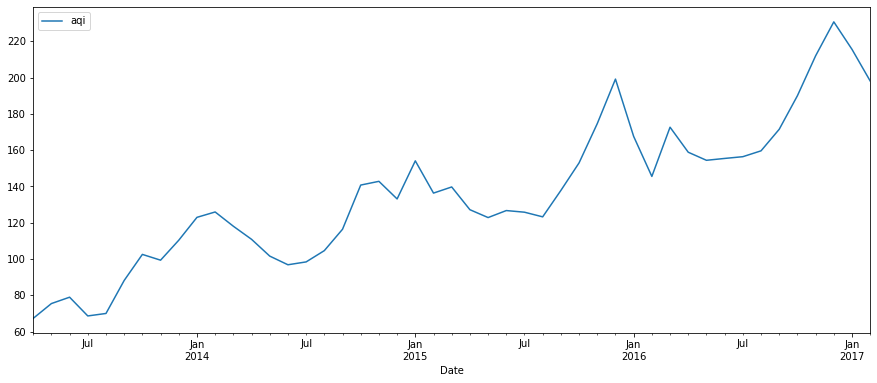

In [35]:


#Visualizando la totalidad de la calidad del aire mediante el indice aqi

df=data.set_index('Date')
df.sort_values(by='Date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.aqi



In [36]:
#Dividimos nuestro dataset en train y test 
n = df.shape[0]
train_size = 0.7

features_dataframe = df.sort_values('Date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

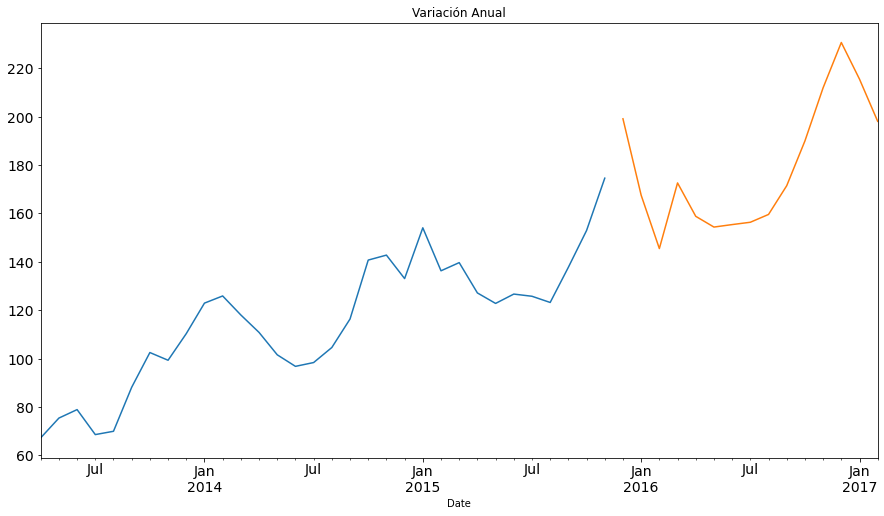

In [37]:
#primera gráfica

train.aqi.plot(figsize=(15,8), title= 'Varianción Anual', fontsize=14)
test.aqi.plot(figsize=(15,8), title= 'Variación Anual', fontsize=14)
plt.show()

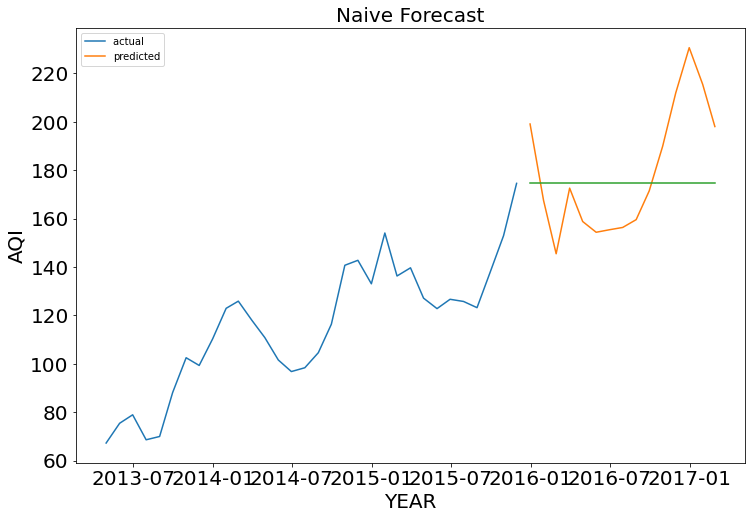

In [38]:
#Naive method forecasting The naïve method of forecasting dictates that we use the previous period to forecast for the next period. 
#https://www.avercast.com/post/naive-forecasting

dd= np.asarray(train.aqi)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['aqi'], label='Train')
plt.plot(test.index,test['aqi'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()



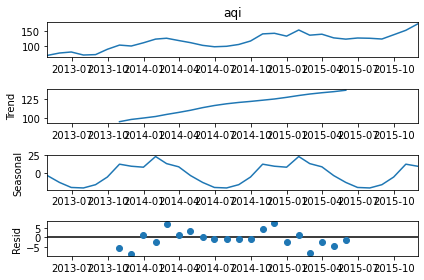

In [39]:
import statsmodels.api as sm

train.index = pd.to_datetime(train.index) 
sm.tsa.seasonal_decompose(train.aqi).plot()
result = sm.tsa.stattools.adfuller(train.aqi)


In [40]:
#Reparamos el indice de df para que sea compatible con el modelo
df = df.reset_index()


In [41]:
df.head()

,Date,aqi
0,2013-04-30,67.276083
1,2013-05-31,75.438269
2,2013-06-30,78.943014
3,2013-07-31,68.618314
4,2013-08-31,69.981089


In [42]:
#Creamos la columna año para trabajar con el año directamente
df['year'] = df['Date'].dt.year 
df.head()

,Date,aqi,year
0,2013-04-30,67.276083,2013
1,2013-05-31,75.438269,2013
2,2013-06-30,78.943014,2013
3,2013-07-31,68.618314,2013
4,2013-08-31,69.981089,2013


In [43]:

cols =['year'] 
y = df['aqi']
x=df[cols]

#Normalizando los datos

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]




In [44]:
# Applying GRADIENT DESCENT 
#La fòrmula resumida la conseguì de Anbarivan.N.L la usó en 2018 en un problema de aqi en la india

alpha = 0.1 #Step size
iterations = 10000 #No. of iterations
m = y.size #No. of data points
np.random.seed(92) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 135.76, 34.49


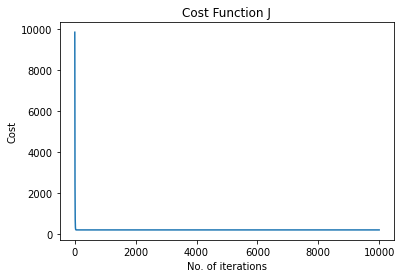

In [45]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [46]:

# Evaluando el modelo usando rmse 

newB=[135.76, 34.49] 

def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse
# Predicición de la serie de tiempo usando 
y_pred=x.dot(newB) 

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)





,Date,aqi,year,Actual,Predicted
0,2013-04-30,67.276083,2013,67.276083,85.922925
1,2013-05-31,75.438269,2013,75.438269,85.922925
2,2013-06-30,78.943014,2013,78.943014,85.922925
3,2013-07-31,68.618314,2013,68.618314,85.922925
4,2013-08-31,69.981089,2013,69.981089,85.922925
5,2013-09-30,88.165532,2013,88.165532,85.922925
6,2013-10-31,102.525188,2013,102.525188,85.922925
7,2013-11-30,99.338891,2013,99.338891,85.922925
8,2013-12-31,110.339992,2013,110.339992,85.922925
9,2014-01-31,122.944869,2014,122.944869,115.202207


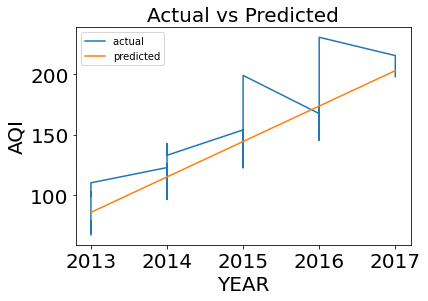

In [47]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted


plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

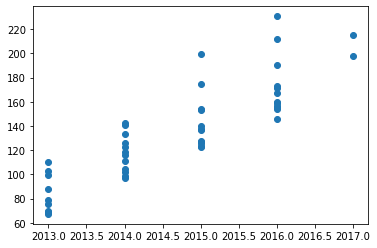

In [48]:


#plotting data points
cols =['year']
y = df['aqi']
x=df[cols]

plt.scatter(x,y)
plt.show()



In [49]:
#volvemos a normalizar los datos

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x



array([[ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -1.44497172],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        , -0.59605083],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,  0.25287005],
       [ 1.        ,

In [50]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

19.82352856605234


In [51]:
from sklearn.preprocessing import MinMaxScaler



In [52]:


#feeding in the x value-years
data=[[-1,2018],[-1,2019],[-1,2020],[-1,2021],[-1,2022], [-1,2023],[-1,2024],[-1,2025],[-1,2026],[-1,2027],[-1,2028],[-1,2029],[-1,2030]]



In [53]:
#normalization
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)

In [54]:


#calculations
newB=[135.76, 34.49]
ypred= np.dot(x,newB) 



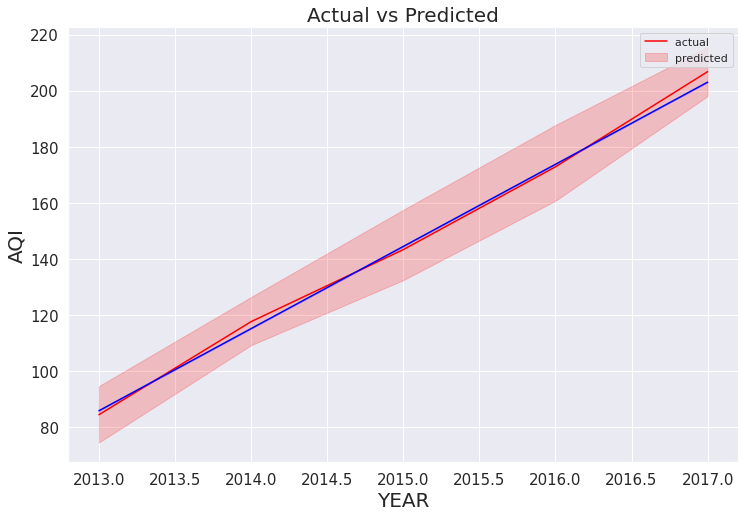

In [55]:
#plot the predicted values and actual values

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

sns.lineplot(x=x_axis,y=y_axis,label="actual", color="red")
sns.lineplot(x=x_axis,y=y1_axis,label="predicted", color="blue")



plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"]) 

plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()



In [56]:
df.tail()

,Date,aqi,year
42,2016-10-31,189.960906,2016
43,2016-11-30,211.941324,2016
44,2016-12-31,230.655676,2016
45,2017-01-31,215.500868,2017
46,2017-02-28,198.063435,2017


In [57]:
#Guardamos los datos en archivos csv para su posterior uso
df.to_csv('dataaqipower.csv', index=False)

In [58]:
data_air_set_model.to_csv('data_air_set_model_final.csv', index=False)